<a href="https://colab.research.google.com/github/baesumin/DeepLearning/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 
import numpy as np 
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"burningsm","key":"4e7ef853c72b5a88c0801c4d04fb5e39"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:36<00:00, 62.5MB/s]
100% 2.29G/2.29G [00:36<00:00, 67.4MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

In [6]:
import PIL.Image as Image
import PIL.ImageOps as ImageOps
import os

In [7]:
def resize_img(img,size):
    return img.resize(size)

In [8]:
def load_img(file_path):
  data = []
  print(p + file_path[1:] + '/')
  for f in os.listdir(file_path):
    data.append(resize_img(Image.open(p + file_path[1:] + '/' + f) , (64,64)))
  return data

In [9]:
p = '/content/chest_xray'
os.chdir(p) #/content/chest_xray/train/NORMAL

In [10]:
!ls 

chest_xray  __MACOSX  test  train  val


In [17]:
train_normal = load_img('./train/NORMAL')
train_abnormal = load_img('./train/PNEUMONIA')
test_normal = load_img('./test/NORMAL')
test_abnormal = load_img('./test/PNEUMONIA')
val_normal = load_img('./val/NORMAL')
val_abnormal = load_img('./val/PNEUMONIA')

/content/chest_xray/train/NORMAL/
/content/chest_xray/train/PNEUMONIA/
/content/chest_xray/test/NORMAL/
/content/chest_xray/test/PNEUMONIA/
/content/chest_xray/val/NORMAL/
/content/chest_xray/val/PNEUMONIA/


In [22]:
for i in range(0,len(train_normal)):
  train_normal[i] = np.array(ImageOps.grayscale(train_normal[i]),dtype='uint8')
for i in range(0,len(train_abnormal)):
  train_abnormal[i] = np.array(ImageOps.grayscale(train_abnormal[i]),dtype='uint8')
for i in range(0,len(test_normal)):
  test_normal[i] = np.array(ImageOps.grayscale(test_normal[i]),dtype='uint8')
for i in range(0,len(test_abnormal)):
  test_abnormal[i] = np.array(ImageOps.grayscale(test_abnormal[i]),dtype='uint8')
for i in range(0,len(val_normal)):
  val_normal[i] = np.array(ImageOps.grayscale(val_normal[i]),dtype='uint8')
for i in range(0,len(val_abnormal)):
  val_abnormal[i] = np.array(ImageOps.grayscale(val_abnormal[i]),dtype='uint8')

In [24]:
train_normal = img_to_array(train_normal)
train_abnormal = img_to_array(train_abnormal)
test_normal = img_to_array(test_normal)
test_abnormal = img_to_array(test_abnormal)
val_normal = img_to_array(val_normal)
val_abnormal = img_to_array(val_abnormal)

In [ ]:
train_normal

In [26]:
train_normal = train_normal / 255.0
train_abnormal = train_abnormal / 255.0
test_normal = test_normal / 255.0
test_abnormal = test_abnormal / 255.0
val_normal = val_normal / 255.0
val_abnormal = val_abnormal / 255.0

In [27]:
import pandas as pd 
import numpy as np

In [28]:
train_x = np.vstack((train_normal,train_abnormal))
test_x = np.vstack((test_normal,test_abnormal))
val_x = np.vstack((val_normal,val_abnormal))

In [29]:
train_x_x = train_x.reshape((train_x.shape[0],train_x.shape[1],train_x.shape[2],1))
test_x_x = test_x.reshape((test_x.shape[0],test_x.shape[1],test_x.shape[2],1))
val_x_x = val_x.reshape((val_x.shape[0],val_x.shape[1],val_x.shape[2],1))

In [30]:
train_y = np.vstack((np.zeros(1341).reshape(-1,1),np.ones(3875).reshape(-1,1)))
test_y = np.vstack((np.zeros(234).reshape(-1,1),np.ones(390).reshape(-1,1)))
val_y = np.vstack((np.zeros(8).reshape(-1,1),np.ones(8).reshape(-1,1)))

In [31]:
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)
val_y = np_utils.to_categorical(val_y)

In [59]:
# create CNN model
def cnn_model():
  # define model
  model = Sequential()

  model.add(Convolution2D(32, (3, 3), activation='relu',input_shape=(64,64,1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(rate=0.3))

  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(rate=0.3))

  model.add(Convolution2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(rate=0.3))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  return model

In [60]:
# build the model
model = cnn_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)      

In [61]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy'],
)

In [66]:
# Fit the model
disp= model.fit(train_x_x, train_y, 
                validation_data=(val_x_x, val_y), 
                epochs=10, 
                batch_size=200, 
                verbose=1)

# Final evaluation of the model
scores = model.evaluate(test_x_x, test_y, verbose=0)
print("loss: %.2f" % scores[0])
print("acc: %.2f" % scores[1])

Epoch 1/10
27/27 [==============================] - 0s 16ms/step - loss: 0.0604 - accuracy: 0.9762 - val_loss: 0.4090 - val_accuracy: 0.6875
Epoch 2/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0638 - accuracy: 0.9760 - val_loss: 0.2166 - val_accuracy: 0.9375
Epoch 3/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0866 - accuracy: 0.9670 - val_loss: 0.2646 - val_accuracy: 0.8750
Epoch 4/10
27/27 [==============================] - 0s 15ms/step - loss: 0.1020 - accuracy: 0.9594 - val_loss: 0.2081 - val_accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0757 - accuracy: 0.9714 - val_loss: 0.5025 - val_accuracy: 0.7500
Epoch 6/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0559 - accuracy: 0.9797 - val_loss: 0.1721 - val_accuracy: 0.9375
Epoch 7/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0565 - accuracy: 0.9793 - val_loss: 0.1387 - val_accuracy: 1.0000
Epoch 8/10
27

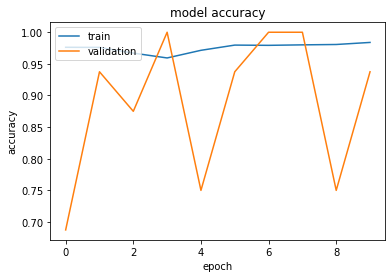

In [67]:
# summarize history for accuracy
plt.plot(disp.history['accuracy'])
plt.plot(disp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()